# Problem 1. 
The dataset sales.csv contains the daily sales of a product for 1000 days.Visually
demonstrate that the daily sales follows a normal distribution.

In this problem, you will be fitting a normal distribution to the observed dataset by
minimizing the negative log-likelihood function. Using the probability distribution function
for a normal distribution 𝑁 (𝜇, 𝜎2)with two parameters: mean 𝜇 and variance 𝜎2, obtain
the negative log-likelihood function. Using gradient descent, minimize the negative log-
likelihood function to estimate the parameters 𝜇 and 𝜎 that best explain the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [24]:
df = pd.read_csv('sales.csv')
sales = df[['DAILY SALES']]
sales.head()

,DAILY SALES
0,84
1,86
2,107
3,89
4,89


In [30]:
#types of columns in the dataframe
sales.dtypes

DAILY SALES    int64
dtype: object

In [31]:
#null
sales.isnull().sum()

DAILY SALES    0
dtype: int64

# Mathematical Formulation
-------------------------
**Negative Log-Likelihood Function**: 

The negative log-likelihood function for a normal distribution with mean $\mu$ and variance $\sigma^2$ is given by:


$$
-\log(L(\mu, \sigma^2)) = \frac{n}{2} \log(2\pi\sigma^2) + \frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_i - \mu)^2
$$

where $n$ is the number of observations and $x_i$ are the observed sales.

-------------------------
**Gradient Descent**: 

To minimize the negative log-likelihood function, we can use gradient descent, which iteratively updates the parameters $\mu$ and $\sigma^2$ in the direction that reduces the negative log-likelihood.

The update equations for the parameters using gradient descent are:

$$
\mu_{new} = \mu_{old} - \alpha \frac{\partial}{\partial \mu}(-\log(L(\mu, \sigma^2)))
$$

$$
\sigma^2_{new} = \sigma^2_{old} - \alpha \frac{\partial}{\partial \sigma^2}(-\log(L(\mu, \sigma^2)))
$$

where $\alpha$ is the learning rate.

The partial derivatives of the negative log-likelihood function with respect to $\mu$ and $\sigma^2$ are:

$$
\frac{\partial}{\partial \mu}(-\log(L(\mu, \sigma^2))) = -\frac{1}{\sigma^2} \sum_{i=1}^{n} (x_i - \mu)
$$

$$
\frac{\partial}{\partial \sigma^2}(-\log(L(\mu, \sigma^2))) = -\frac{n}{2\sigma^2} + \frac{1}{2(\sigma^2)^2} \sum_{i=1}^{n} (x_i - \mu)^2
$$

By iteratively applying these updates, we can find the values of $\mu$ and $\sigma^2$ that minimize the negative log-likelihood, thus fitting the normal distribution to the data.

(array([0.00068182, 0.        , 0.00068182, 0.        , 0.00136364,
        0.        , 0.00272727, 0.00136364, 0.00340909, 0.        ,
        0.00136364, 0.00409091, 0.00477273, 0.00477273, 0.00409091,
        0.01022727, 0.00818182, 0.01636364, 0.01159091, 0.01840909,
        0.00886364, 0.02181818, 0.00818182, 0.02795455, 0.01295455,
        0.02590909, 0.01840909, 0.03613636, 0.01840909, 0.01636364,
        0.02931818, 0.02386364, 0.03818182, 0.01704545, 0.02863636,
        0.01704545, 0.03681818, 0.01977273, 0.03136364, 0.015     ,
        0.02113636, 0.01431818, 0.01704545, 0.00545455, 0.00681818,
        0.01295455, 0.00954545, 0.01159091, 0.00272727, 0.01022727,
        0.00477273, 0.00613636, 0.00068182, 0.00340909, 0.00272727,
        0.00340909, 0.        , 0.00204545, 0.        , 0.00068182]),
 array([ 33.        ,  34.46666667,  35.93333333,  37.4       ,
         38.86666667,  40.33333333,  41.8       ,  43.26666667,
         44.73333333,  46.2       ,  47.66666667,  49.

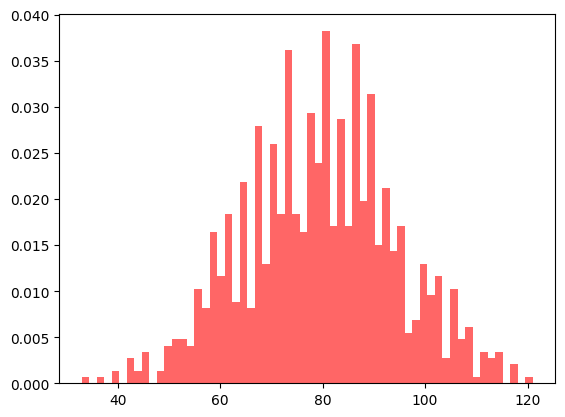

In [42]:
#histogram DAILY SALES
plt.hist(sales, bins=60, density=True, alpha=0.6, color='r')


In [62]:
# Negative log-likelihood function
def neg_log_likelihood(mu, sigma_sq, data):
    n = len(data)
    return (n/2)*np.log(2*np.pi*sigma_sq) + (1/(2*sigma_sq))*np.sum((data - mu)**2)

# Gradient of the negative log-likelihood function
def grad_neg_log_likelihood(mu, sigma_sq, data):
    grad_mu = -np.sum(data - mu) / sigma_sq
    grad_sigma_sq = -len(data)/(2*sigma_sq) + np.sum((data - mu)**2) / (2*sigma_sq**2)
    return grad_mu, grad_sigma_sq

# Gradient descent function
def gradient_descent(data, initial_mu, initial_sigma_sq, learning_rate, num_iterations):
    mu, sigma_sq = initial_mu, initial_sigma_sq
    for _ in range(num_iterations):
        grad_mu, grad_sigma_sq = grad_neg_log_likelihood(mu, sigma_sq, data)
        mu -= learning_rate * grad_mu
        sigma_sq -= learning_rate * grad_sigma_sq
        # Ensure that variance remains positive
        sigma_sq = max(sigma_sq, 1e-6)
    return mu, sigma_sq

# Extract the data
data = sales['DAILY SALES']

# Initial parameters
initial_mu = 50
initial_sigma_sq = 200

# Hyperparameters for gradient descent
learning_rate = 0.001
num_iterations = 5000

# Run gradient descent
estimated_mu, estimated_sigma_sq = gradient_descent(data, initial_mu, initial_sigma_sq, learning_rate, num_iterations)




In [63]:
# Print the estimated parameters
print(f"data mean: {np.mean(data)}")
print(f"data variance: {np.var(data)}")
print(f"Estimated mean (mu): {estimated_mu}")
print(f"Estimated variance (sigma^2): {estimated_sigma_sq}")

data mean: 79.379
data variance: 218.453359
Estimated mean (mu): 79.3789999996908
Estimated variance (sigma^2): 197.63435542062496


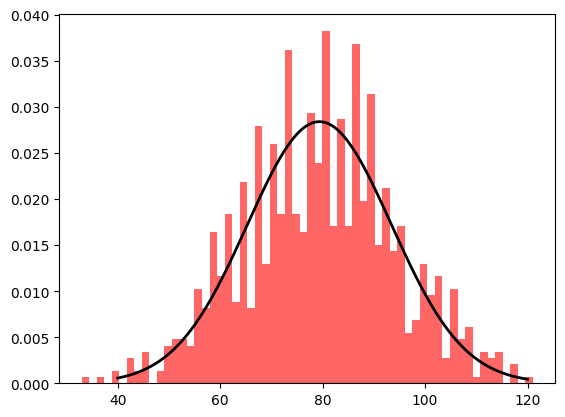

In [64]:
#plot the normal distribution
x = np.linspace(40, 120, 1000)
y = norm.pdf(x, estimated_mu, np.sqrt(estimated_sigma_sq))
plt.plot(x, y, 'k', linewidth=2)

#plot the histogram
plt.hist(sales, bins=60, density=True, alpha=0.6, color='r')
plt.show()

## Problem 2. 

Consider two objective functions 

For the function $f(x,y)$:
$$
f(x,y) = (x - 5)^2 + 2(y + 3)^2 + xy
$$

And for the function $g(x,y)$:
$$
g(x,y) = \left(1 - (y - 3)\right)^2 + 10\left((x + 4) - (y - 3)^2\right)^2
$$

Starting with (𝑥,𝑦) =(0, 2)run the gradient descent algorithm to minimize each function.
Plot the value of the objective function after each gradient descent step. Use a fixed learning
rate of 𝛾 =0.05 for objective function 𝑓 and 𝛾 =0.0015 for objective function 𝑔.
Then, employ an exponential decay learning rate and an inverse decay learning rate.
Compare their performance with a constant learning rate. Can you tune the parameters to
achieve faster optimization with either of the decaying learning rates? What is the least
number of iterations within which you are able to optimize the two functions?


In [212]:
import time
import matplotlib.pyplot as plt
from matplotlib import cm

def f(x, y):
    return (x - 5)**2 + 2*(y + 3)**2 + x*y

def g(x, y):
    return (1 - (y - 3))**2 + 10*((x + 4) - (y - 3)**2)**2

def grad_f(x, y):
    grad_x = 2*(x - 5) + y
    grad_y = 4*(y + 3) + x
    return grad_x, grad_y

def grad_g(x, y):
    grad_x = 20*((x + 4) - (y - 3)**2)
    grad_y = -2*(4 - y) - 40*((x + 4) - (y - 3)**2)*(y - 3)
    return grad_x, grad_y

    

def gradient_descent(x, y, learning_rate, func='f', decay_type='constant', decay_rate=0.99):
    start_time = time.time()
    i = 0
    diff = 1
    x_vals, y_vals, func_vals = [], [], []
    decay_rate = decay_rate if decay_type != 'constant' else None
    
    while diff > 0.001:
        if decay_type == 'exponential':
            current_learning_rate = learning_rate * np.exp(-decay_rate * i)
        elif decay_type == 'inverse':
            current_learning_rate = learning_rate / (1 + decay_rate * i)
        else:  # Assuming 'constant'
            current_learning_rate = learning_rate
        
        if func == 'f':
            grad_x, grad_y = grad_f(x, y)
            current_func = f
        elif func == 'g':
            grad_x, grad_y = grad_g(x, y)
            current_func = g
        
        x -= current_learning_rate * grad_x
        y -= current_learning_rate * grad_y
        diff = abs(current_func(x, y) - current_func(x - current_learning_rate * grad_x, y - current_learning_rate * grad_y))
        i += 1
        x_vals.append(x)
        y_vals.append(y)
        func_vals.append(current_func(x, y))
        print("iteration:", i, func + "(x, y) = ", round(current_func(x, y), 2))

    end_time = time.time()
    time_taken = end_time - start_time
    print(f"\n\nminima of {func}(x, y) is ", current_func(x, y), " at \nx = ", x, "\ny = ", y,
          "\ntime taken = ", time_taken , "\niterations = ", i)

    # Plotting
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Create a mesh grid for the surface plot
    x_grid, y_grid = np.meshgrid(np.linspace(min(x_vals) - 1, max(x_vals) + 1, 30), 
                                 np.linspace(min(y_vals) - 1, max(y_vals) + 1, 30))
    z_grid = current_func(x_grid, y_grid)

    # Generate a colormap based on the z_grid values
    norm = plt.Normalize(z_grid.min(), z_grid.max())
    colors = cm.viridis(norm(z_grid))

    # Plot the surface with dynamic coloring
    surf = ax.plot_surface(x_grid, y_grid, z_grid, facecolors=colors, alpha=0.5, rstride=1, cstride=1, edgecolor='none')
    ax.scatter(x_vals, y_vals, func_vals, color='r', s=10)  # Plot the optimization path

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel(f'{func}(x, y)')
    # Add a color bar which maps values to colors.
    m = cm.ScalarMappable(cmap=cm.viridis, norm=norm)
    m.set_array([])
    fig.colorbar(m, ax=ax)

    plt.show()

    #plotting function value vs iterations
    plt.plot(func_vals)
    plt.xlabel('Iterations')
    plt.ylabel(f'{func}(x, y)')
    plt.title(f'{func} value: {current_func(x, y)}  Time taken: {round(time_taken,4)}s | Iterations: {i} | Learning rate: {learning_rate} | Decay type: {decay_type} | Decay rate: {decay_rate}' )
    plt.show()

    

    return {
        'x': x, 
        'y': y,
        'function': func,
        'function value': current_func(x, y),
        'learning_rate': learning_rate,
        'decay_type': decay_type,
        'decay_rate': decay_rate,
        'time taken': time_taken,  
        'iterations': i
    }





### Runnning the code with fixed learning rates of 0.05 for function f and 0.0015 for function g

iteration: 1 f(x, y) =  31.47
iteration: 2 f(x, y) =  22.26
iteration: 3 f(x, y) =  14.79
iteration: 4 f(x, y) =  8.67
iteration: 5 f(x, y) =  3.61
iteration: 6 f(x, y) =  -0.6
iteration: 7 f(x, y) =  -4.13
iteration: 8 f(x, y) =  -7.09
iteration: 9 f(x, y) =  -9.58
iteration: 10 f(x, y) =  -11.69
iteration: 11 f(x, y) =  -13.46
iteration: 12 f(x, y) =  -14.96
iteration: 13 f(x, y) =  -16.24
iteration: 14 f(x, y) =  -17.31
iteration: 15 f(x, y) =  -18.22
iteration: 16 f(x, y) =  -18.99
iteration: 17 f(x, y) =  -19.65
iteration: 18 f(x, y) =  -20.2
iteration: 19 f(x, y) =  -20.67
iteration: 20 f(x, y) =  -21.07
iteration: 21 f(x, y) =  -21.41
iteration: 22 f(x, y) =  -21.69
iteration: 23 f(x, y) =  -21.94
iteration: 24 f(x, y) =  -22.14
iteration: 25 f(x, y) =  -22.32
iteration: 26 f(x, y) =  -22.46
iteration: 27 f(x, y) =  -22.59
iteration: 28 f(x, y) =  -22.7
iteration: 29 f(x, y) =  -22.79
iteration: 30 f(x, y) =  -22.86
iteration: 31 f(x, y) =  -22.93
iteration: 32 f(x, y) =  -22.98

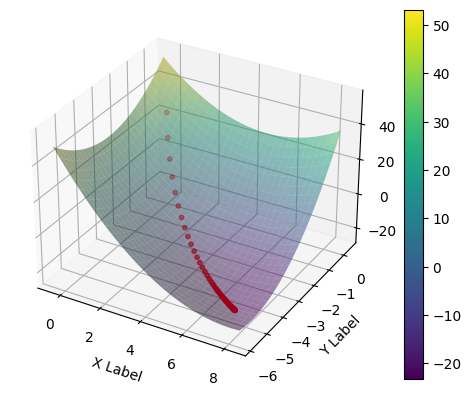

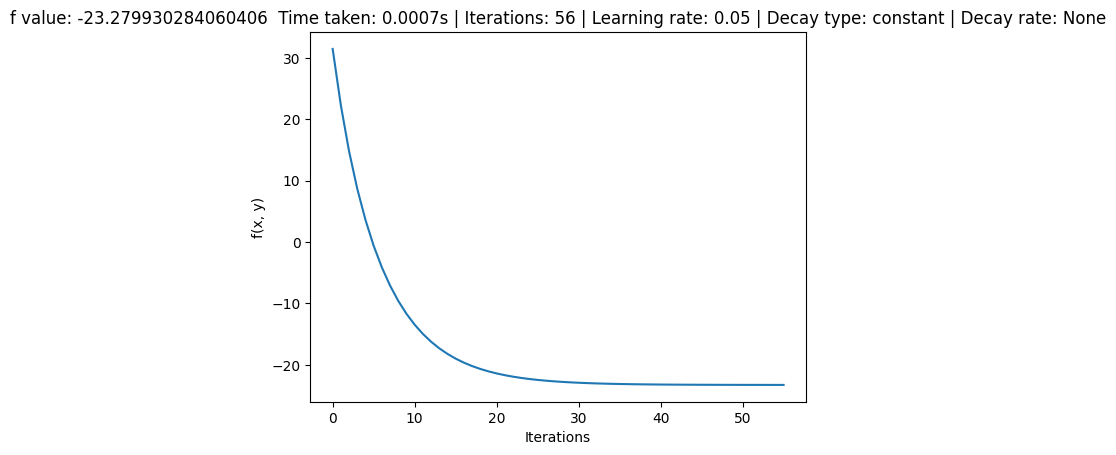

In [226]:
results = [gradient_descent(0, 0, 0.05, 'f', 'constant')]

iteration: 1 f(x, y) =  31.47
iteration: 2 f(x, y) =  22.69
iteration: 3 f(x, y) =  15.83
iteration: 4 f(x, y) =  10.36
iteration: 5 f(x, y) =  5.94
iteration: 6 f(x, y) =  2.32
iteration: 7 f(x, y) =  -0.68
iteration: 8 f(x, y) =  -3.19
iteration: 9 f(x, y) =  -5.31
iteration: 10 f(x, y) =  -7.11
iteration: 11 f(x, y) =  -8.64
iteration: 12 f(x, y) =  -9.97
iteration: 13 f(x, y) =  -11.11
iteration: 14 f(x, y) =  -12.1
iteration: 15 f(x, y) =  -12.97
iteration: 16 f(x, y) =  -13.73
iteration: 17 f(x, y) =  -14.41
iteration: 18 f(x, y) =  -15.0
iteration: 19 f(x, y) =  -15.53
iteration: 20 f(x, y) =  -16.0
iteration: 21 f(x, y) =  -16.42
iteration: 22 f(x, y) =  -16.79
iteration: 23 f(x, y) =  -17.13
iteration: 24 f(x, y) =  -17.44
iteration: 25 f(x, y) =  -17.71
iteration: 26 f(x, y) =  -17.97
iteration: 27 f(x, y) =  -18.19
iteration: 28 f(x, y) =  -18.4
iteration: 29 f(x, y) =  -18.59
iteration: 30 f(x, y) =  -18.76
iteration: 31 f(x, y) =  -18.92
iteration: 32 f(x, y) =  -19.07
ite

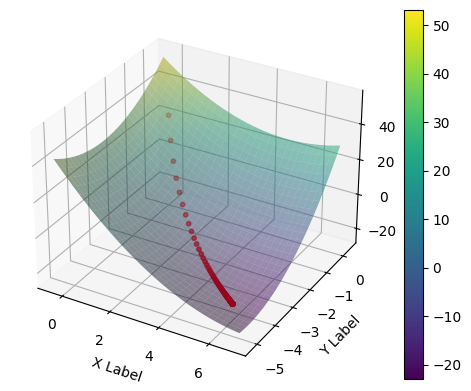

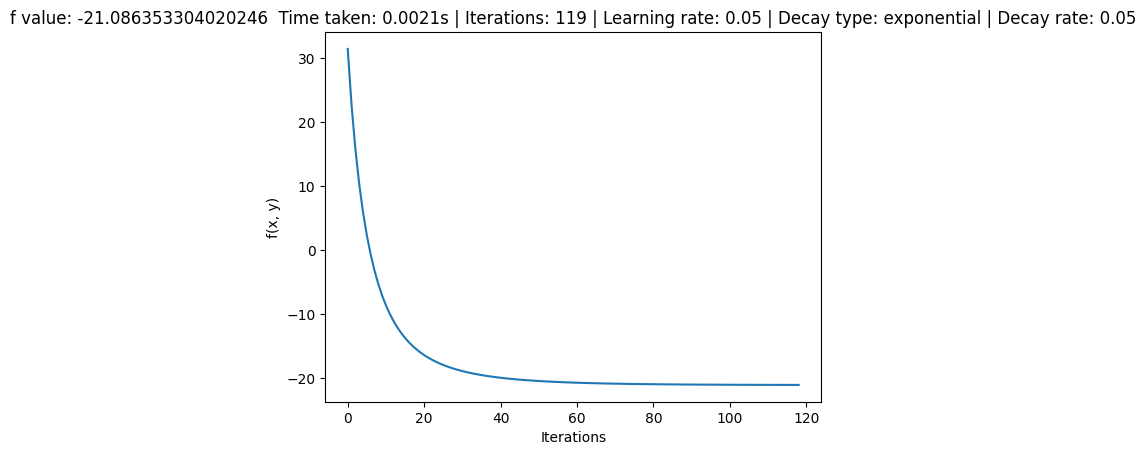

In [227]:
results+=[gradient_descent(0, 0, 0.05, 'f', 'exponential', 0.05)]

iteration: 1 f(x, y) =  31.47
iteration: 2 f(x, y) =  22.68
iteration: 3 f(x, y) =  15.79
iteration: 4 f(x, y) =  10.28
iteration: 5 f(x, y) =  5.79
iteration: 6 f(x, y) =  2.1
iteration: 7 f(x, y) =  -0.99
iteration: 8 f(x, y) =  -3.59
iteration: 9 f(x, y) =  -5.79
iteration: 10 f(x, y) =  -7.68
iteration: 11 f(x, y) =  -9.3
iteration: 12 f(x, y) =  -10.71
iteration: 13 f(x, y) =  -11.93
iteration: 14 f(x, y) =  -13.0
iteration: 15 f(x, y) =  -13.95
iteration: 16 f(x, y) =  -14.78
iteration: 17 f(x, y) =  -15.51
iteration: 18 f(x, y) =  -16.17
iteration: 19 f(x, y) =  -16.75
iteration: 20 f(x, y) =  -17.27
iteration: 21 f(x, y) =  -17.74
iteration: 22 f(x, y) =  -18.16
iteration: 23 f(x, y) =  -18.54
iteration: 24 f(x, y) =  -18.89
iteration: 25 f(x, y) =  -19.2
iteration: 26 f(x, y) =  -19.48
iteration: 27 f(x, y) =  -19.74
iteration: 28 f(x, y) =  -19.97
iteration: 29 f(x, y) =  -20.19
iteration: 30 f(x, y) =  -20.39
iteration: 31 f(x, y) =  -20.57
iteration: 32 f(x, y) =  -20.73
it

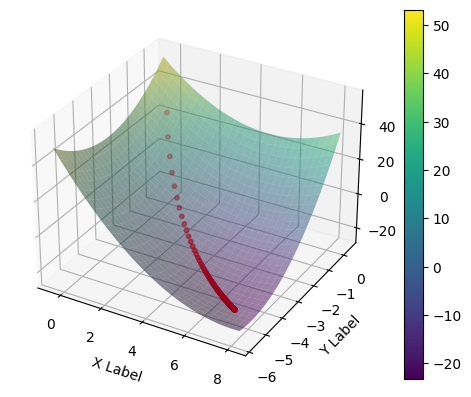

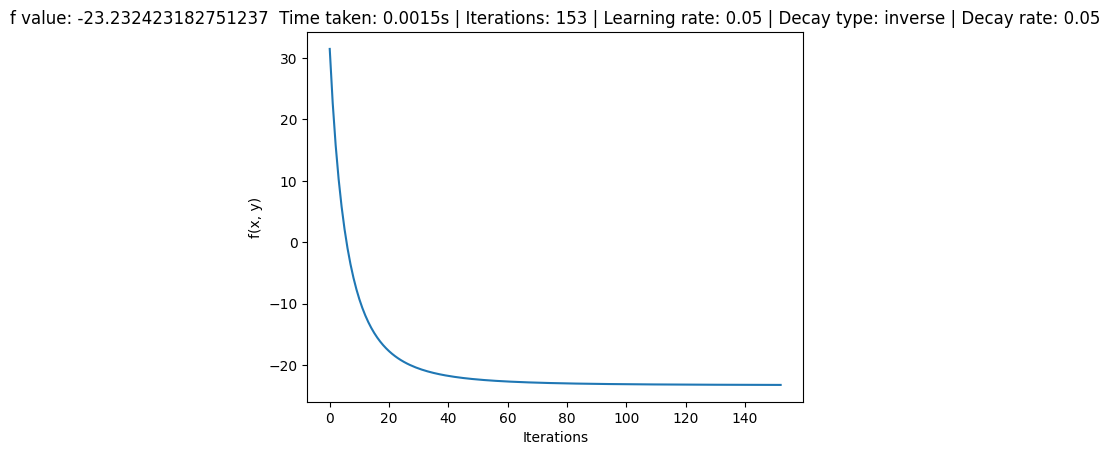

In [228]:
results+=[gradient_descent(0, 0, 0.05, 'f', 'inverse', 0.05)]

iteration: 1 g(x, y) =  9.98
iteration: 2 g(x, y) =  9.35
iteration: 3 g(x, y) =  9.22
iteration: 4 g(x, y) =  9.19
iteration: 5 g(x, y) =  9.18
iteration: 6 g(x, y) =  9.18
iteration: 7 g(x, y) =  9.17
iteration: 8 g(x, y) =  9.17
iteration: 9 g(x, y) =  9.17
iteration: 10 g(x, y) =  9.16
iteration: 11 g(x, y) =  9.16
iteration: 12 g(x, y) =  9.16
iteration: 13 g(x, y) =  9.15
iteration: 14 g(x, y) =  9.15
iteration: 15 g(x, y) =  9.15
iteration: 16 g(x, y) =  9.14
iteration: 17 g(x, y) =  9.14
iteration: 18 g(x, y) =  9.14
iteration: 19 g(x, y) =  9.14
iteration: 20 g(x, y) =  9.13
iteration: 21 g(x, y) =  9.13
iteration: 22 g(x, y) =  9.13
iteration: 23 g(x, y) =  9.12
iteration: 24 g(x, y) =  9.12
iteration: 25 g(x, y) =  9.12
iteration: 26 g(x, y) =  9.11
iteration: 27 g(x, y) =  9.11
iteration: 28 g(x, y) =  9.11
iteration: 29 g(x, y) =  9.1
iteration: 30 g(x, y) =  9.1
iteration: 31 g(x, y) =  9.1
iteration: 32 g(x, y) =  9.09
iteration: 33 g(x, y) =  9.09
iteration: 34 g(x, y) 

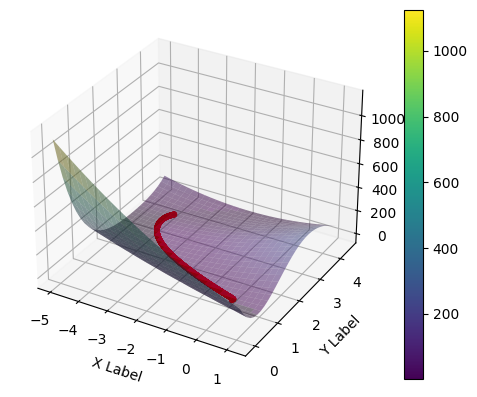

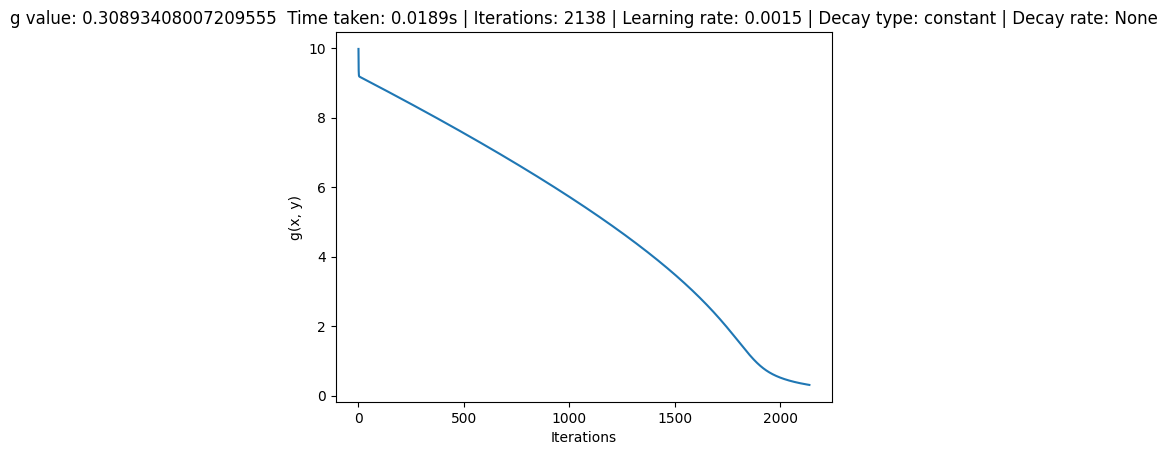

In [229]:
results+=[gradient_descent(0, 0, 0.0015, 'g', 'constant')]

iteration: 1 g(x, y) =  9.98
iteration: 2 g(x, y) =  9.37
iteration: 3 g(x, y) =  9.23
iteration: 4 g(x, y) =  9.2
iteration: 5 g(x, y) =  9.19
iteration: 6 g(x, y) =  9.18
iteration: 7 g(x, y) =  9.18
iteration: 8 g(x, y) =  9.17
iteration: 9 g(x, y) =  9.17
iteration: 10 g(x, y) =  9.17
iteration: 11 g(x, y) =  9.17
iteration: 12 g(x, y) =  9.17
iteration: 13 g(x, y) =  9.16
iteration: 14 g(x, y) =  9.16
iteration: 15 g(x, y) =  9.16
iteration: 16 g(x, y) =  9.16
iteration: 17 g(x, y) =  9.16
iteration: 18 g(x, y) =  9.16
iteration: 19 g(x, y) =  9.16
iteration: 20 g(x, y) =  9.15
iteration: 21 g(x, y) =  9.15
iteration: 22 g(x, y) =  9.15
iteration: 23 g(x, y) =  9.15
iteration: 24 g(x, y) =  9.15
iteration: 25 g(x, y) =  9.15


minima of g(x, y) is  9.149034778407314  at 
x =  0.13680717983173674 
y =  0.9834691244048709 
time taken =  0.0004029273986816406 
iterations =  25


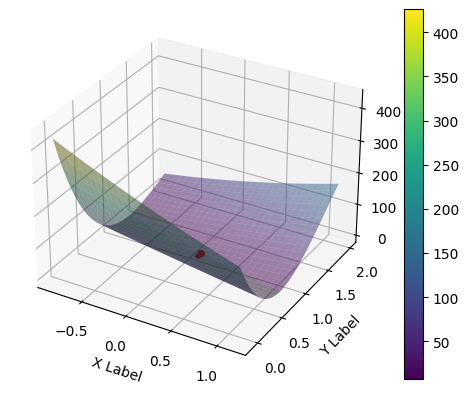

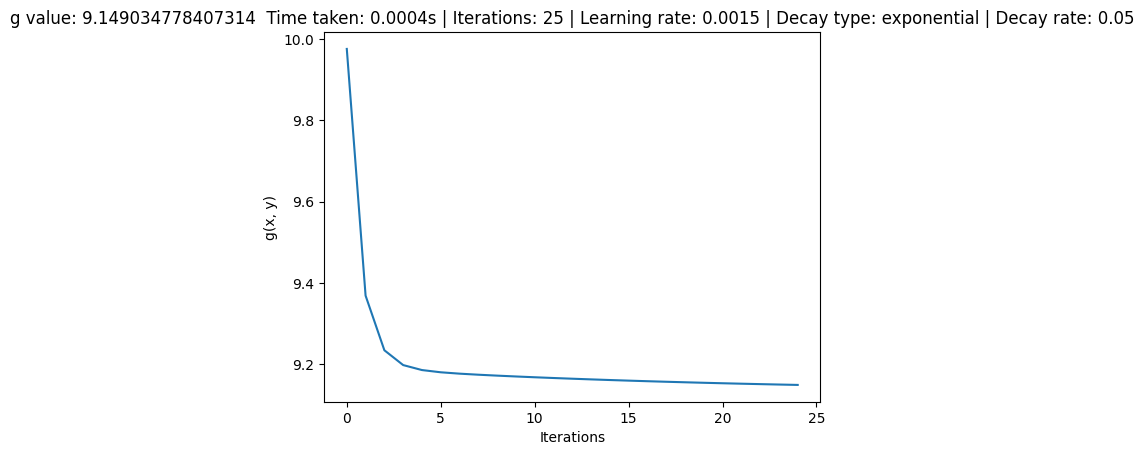

In [230]:
results+=[gradient_descent(0, 0, 0.0015, 'g', 'exponential', 0.05)]

iteration: 1 g(x, y) =  9.98
iteration: 2 g(x, y) =  9.37
iteration: 3 g(x, y) =  9.23
iteration: 4 g(x, y) =  9.2
iteration: 5 g(x, y) =  9.19
iteration: 6 g(x, y) =  9.18
iteration: 7 g(x, y) =  9.18
iteration: 8 g(x, y) =  9.17
iteration: 9 g(x, y) =  9.17
iteration: 10 g(x, y) =  9.17
iteration: 11 g(x, y) =  9.17
iteration: 12 g(x, y) =  9.16
iteration: 13 g(x, y) =  9.16
iteration: 14 g(x, y) =  9.16
iteration: 15 g(x, y) =  9.16
iteration: 16 g(x, y) =  9.16
iteration: 17 g(x, y) =  9.16
iteration: 18 g(x, y) =  9.15
iteration: 19 g(x, y) =  9.15
iteration: 20 g(x, y) =  9.15
iteration: 21 g(x, y) =  9.15
iteration: 22 g(x, y) =  9.15
iteration: 23 g(x, y) =  9.15
iteration: 24 g(x, y) =  9.14
iteration: 25 g(x, y) =  9.14
iteration: 26 g(x, y) =  9.14
iteration: 27 g(x, y) =  9.14
iteration: 28 g(x, y) =  9.14
iteration: 29 g(x, y) =  9.14
iteration: 30 g(x, y) =  9.14
iteration: 31 g(x, y) =  9.14
iteration: 32 g(x, y) =  9.13
iteration: 33 g(x, y) =  9.13
iteration: 34 g(x, y

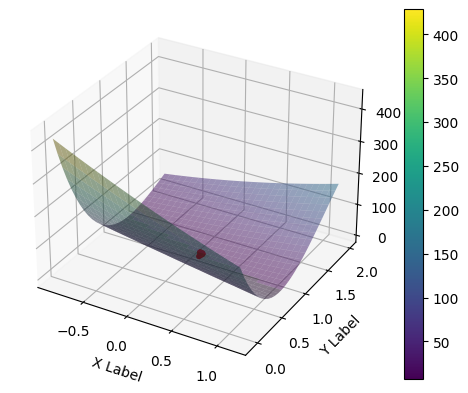

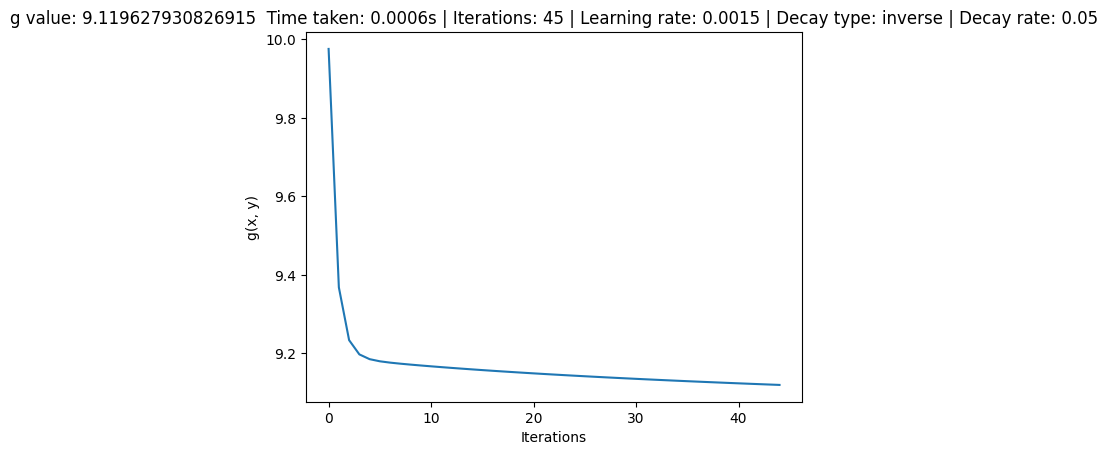

In [231]:
results+=[gradient_descent(0, 0, 0.0015, 'g', 'inverse', 0.05)]

## Printing the Results in a dataframe  

In [232]:
columns = ['x', 'y','function', 'function value','learning_rate', 'decay_type','decay_rate', 'time taken', 'iterations']
df = pd.DataFrame(columns=columns)

#concating the results in df
df = pd.concat([df, pd.DataFrame(results)], ignore_index=True)
df

,x,y,function,function value,learning_rate,decay_type,decay_rate,time taken,iterations
0,7.349664,-4.824457,f,-23.279930,0.0500,constant,NaN,0.000661,56
1,5.895189,-4.207333,f,-21.086353,0.0500,exponential,0.05,0.002114,119
2,7.189081,-4.757870,f,-23.232423,0.0500,inverse,0.05,0.001481,153
3,-3.824360,3.451292,g,0.308934,0.0015,constant,NaN,0.018896,2138
4,0.136807,0.983469,g,9.149035,0.0015,exponential,0.05,0.000403,25
5,0.117162,0.988366,g,9.119628,0.0015,inverse,0.05,0.000567,45


## Optimising the decay rate

In [ ]:
# run for multiple decay rates 0 to 1 in step of 0.1
decay_rates = np.arange(0.09, 0.99, 0.1)

results = [gradient_descent(0, 0, 0.05, 'f', 'exponential', decay_rate) for decay_rate in decay_rates]
results += [gradient_descent(0, 0, 0.0015, 'g', 'exponential', decay_rate) for decay_rate in decay_rates]
results += [gradient_descent(0, 0, 0.05, 'f', 'inverse', decay_rate) for decay_rate in decay_rates]
results += [gradient_descent(0, 0, 0.0015, 'g', 'inverse', decay_rate) for decay_rate in decay_rates]
results += [gradient_descent(0, 0, 0.05, 'f', 'constant')]
results += [gradient_descent(0, 0, 0.0015, 'g', 'constant')]

df = pd.DataFrame(columns=columns)

for result in results:
    df = df.append(result, ignore_index=True)

#sort by iterations
df.sort_values(by='iterations', ascending=True, inplace=True)



In [246]:
df

,x,y,function,function value,learning_rate,decay_type,decay_rate,time taken,iterations
17,0.153753,0.934063,g,9.530712,0.0015,exponential,0.89,0.000138,8
16,0.154285,0.937502,g,9.478124,0.0015,exponential,0.79,0.000130,9
15,0.154887,0.941606,g,9.421181,0.0015,exponential,0.69,0.000155,10
14,0.155546,0.946474,g,9.361752,0.0015,exponential,0.59,0.000145,10
13,0.156226,0.952328,g,9.301795,0.0015,exponential,0.49,0.000148,11
12,0.156787,0.959203,g,9.247099,0.0015,exponential,0.39,0.000163,12
8,0.831215,-0.941133,f,25.074359,0.0500,exponential,0.89,0.000155,12
10,0.155614,0.973818,g,9.182979,0.0015,exponential,0.19,0.000178,12
11,0.156843,0.966878,g,9.205237,0.0015,exponential,0.29,0.000169,13
7,0.893904,-1.003333,f,23.936500,0.0500,exponential,0.79,0.000168,13


## Function f(x,y) results with learning rate of 0.05

- For constant learning rate function converge in 56 iterations with function value of -23.27
- For optimal Exponential decay rate of 0.89 function converge in 12 iterations with function value of 25.07
- For optimal inverse decay rate of 0.09 function converge in 281 iterations with function value of -23.122

Exponential decay rate though the function converge in 12 iterations but the value of the function is not minimum, it converges to a local minimum.



In [248]:
df.loc[(df['decay_type'] == 'constant') & (df['function'] == 'f')].head(1)

,x,y,function,function value,learning_rate,decay_type,decay_rate,time taken,iterations
36,7.349664,-4.824457,f,-23.27993,0.05,constant,None,0.000407,56


In [247]:
df.loc[(df['decay_type'] == 'exponential') & (df['function'] == 'f')].head(1)

,x,y,function,function value,learning_rate,decay_type,decay_rate,time taken,iterations
8,0.831215,-0.941133,f,25.074359,0.05,exponential,0.89,0.000155,12


In [252]:
df.loc[(df['decay_type'] == 'inverse') & (df['function'] == 'f')].head(1)

,x,y,function,function value,learning_rate,decay_type,decay_rate,time taken,iterations
18,7.009117,-4.683008,f,-23.122168,0.05,inverse,0.09,0.00257,281


# function g(x,y) results with learning rate of 0.0015

- For constant learning rate function converge in 2138 iterations with function value of 0.30
- For optimal Exponential decay rate of 0.89 function converge in 8 iterations with function value of 9.53
- For optimal inverse decay rate of 0.19 function converge in 15 iterations with function value of 9.17

exponential decay rate has minimum number of iterations but the value of the function is not minimum, it converges to a local minimum.


In [249]:
df.loc[(df['decay_type'] == 'constant') & (df['function'] == 'g')].head(1)

,x,y,function,function value,learning_rate,decay_type,decay_rate,time taken,iterations
37,-3.82436,3.451292,g,0.308934,0.0015,constant,None,0.013872,2138


In [250]:
df.loc[(df['decay_type'] == 'exponential') & (df['function'] == 'g')].head(1)

,x,y,function,function value,learning_rate,decay_type,decay_rate,time taken,iterations
17,0.153753,0.934063,g,9.530712,0.0015,exponential,0.89,0.000138,8


In [251]:
df.loc[(df['decay_type'] == 'inverse') & (df['function'] == 'g')].head(1)

,x,y,function,function value,learning_rate,decay_type,decay_rate,time taken,iterations
28,0.151649,0.978575,g,9.171898,0.0015,inverse,0.19,0.000205,15
